In [3]:
import pandas as pd
import paths as P
import json
import numpy as np

In [4]:
data = pd.read_csv('out_new_train.csv')

In [5]:
def read_cluster(df, i):
    col_list = df[i].tolist()
    col_set = set()
    for phrase in col_list:
        if type(phrase) == str:
            col_set.add(phrase)
    return col_set

In [6]:
all_clusters = dict()
for col in data.columns.tolist():
    boom = read_cluster(data, col)
    all_clusters[int(col)] = list(boom)


In [7]:
len(all_clusters)

5

In [8]:
# Read train file
train_dir = f'{P.annotations_path}train.json'

with open(train_dir, 'r') as jsonfile:
    train_data = json.load(jsonfile)

In [9]:
which_group_which_caption = dict()

for a in train_data['annotations']:
    cap = a['caption']
    img_id = a['image_id']
    if img_id not in which_group_which_caption:
        which_group_which_caption[img_id] = dict()
    for cluster_nr, phrases in all_clusters.items():
        for phrase in phrases:
            if phrase in cap:
                if cluster_nr not in which_group_which_caption[img_id]:
                    which_group_which_caption[img_id][cluster_nr] = 0
                which_group_which_caption[img_id][cluster_nr] += 1


In [10]:
# Function to determine which image can be classified as which group
# if there's only one relevant group: keep that
# otherwise: keep biggest.
# later stage: check for other groups.

def keyswithmaxval(d):
    if len(d) == 1:
        return list(d.keys())
    k = list(d.keys()); v = list(d.values())
    indices = [i for i, x in enumerate(v) if x == max(v)]
    important_groups = list()
    for i in indices:
        important_groups.append(k[i])
    return tuple(important_groups)

In [11]:
new_json = dict()

for img in which_group_which_caption:
    # new_json[img] = dict()
    groups = which_group_which_caption[img]
    new_json[img] = keyswithmaxval(groups)

    # print(groups)
    # for g in groups:
    #     relevant = keyswithmaxval(g)
            # print(img, g, groups[g])

print(len(new_json) == len(which_group_which_caption))

True


In [12]:
D = dict()

for img in new_json:
    for group in new_json[img]:
        if group not in D:
            D[group] = 0
        D[group] += 1

print(len(D))

5


In [13]:
for img in new_json:
    if len(new_json[img]) > 1:
        if 6 or 10 in new_json:
            remove_six = list()
            for g in new_json[img]:
                if g != 6 or 10:
                    remove_six.append(g)
            new_json[img] = tuple(remove_six)

5


<AxesSubplot:>

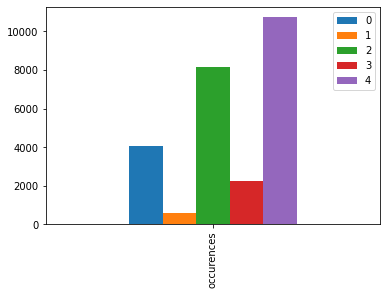

In [14]:
Dplus = dict()

for img in new_json:
    for group in new_json[img]:
        if group not in Dplus:
            Dplus[group] = 0
        Dplus[group] += 1

print(len(Dplus))

df = pd.DataFrame(Dplus, index=['occurences'])
df = df.reindex(sorted(df.columns), axis=1)
df.plot(kind='bar')

In [15]:
ids = np.load(f'{P.maindir}vw_train.npy')
ids = set(ids)
len(ids)

17028

In [16]:
newest_json = dict()
for key, value in new_json.items():
    if key in ids:
        newest_json[key] = value

print(len(new_json) > len(newest_json))
print(len(newest_json) == len(ids))

True
True


5


<AxesSubplot:>

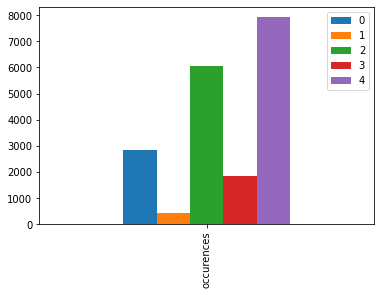

In [17]:
DD = dict()

for img in newest_json:
    for group in newest_json[img]:
        if group not in DD:
            DD[group] = 0
        DD[group] += 1

print(len(DD))

df = pd.DataFrame(DD, index=['occurences'])
df = df.reindex(sorted(df.columns), axis=1)
df.plot(kind='bar')

In [18]:
# Underrepresented: 1, 3
# Overrepresented: 2, 4
# Middle ground: 0

# First sieve
for key, value in newest_json.items():
    if 4 in value and len(value) >= 2:
        value = list(value)
        value.remove(4)
        newest_json[key] = value

In [19]:
# Second sieve
for key, value in newest_json.items():
    if 2 in value and len(value) >= 2:
        value = list(value)
        value.remove(2)
        newest_json[key] = value

In [20]:
# Third sieve
for key, value in newest_json.items():
    if 1 in value and len(value) >=2:
        newest_json[key] = [1]

In [21]:
# Fourth sieve
for key, value in newest_json.items():
    if 3 in value and len(value) >=2:
        newest_json[key] = [3]

In [22]:
# Sanity check
for key, value in newest_json.items():
    if len(value) != 1:
        print(key, value)
    newest_json[key] = value[0]
# Should return nothing!

In [72]:
with open("pretty_output4.json", 'w') as out:
    json.dump(newest_json, out, indent=2)

5


<AxesSubplot:>

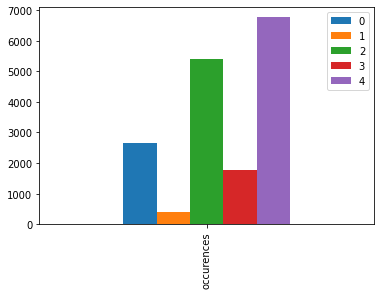

In [23]:
DDD = dict()

for img in newest_json:
    group = newest_json[img]
    if group not in DDD:
        DDD[group] = 0
    DDD[group] += 1

print(len(DDD))

df = pd.DataFrame(DDD, index=['occurences'])
df = df.reindex(sorted(df.columns), axis=1)
df.plot(kind='bar')